# GMT327 Orbital Mechanics and Astronomy

## Undisturbed  Equation of motion described by keplerian elements.

If all disturbing forces are ignored the orbital motion of an artificial satellite can be described by the gravitational acceleration due to Earth as:

$$
\ddot{\boldsymbol{r}} = -\frac{GM}{r^2}\frac{\boldsymbol{r}}{r}
$$


where, $G$ is the universal gravitational constant, M is the mass of Earth (assumed as a point mass), $\boldsymbol{r}$ is the geocentric position vector of the satellite.

Under the assumptions the motion of the satellite can be described by the following Keplerian Elements.

- $a$ : the semi major axis of the orbit
- $e$ : the eccentricity of the orbit
- $i$ : the inclination of the orbit
- $\Omega$: longitude of the ascending node (right ascension of the ascending node)
- $\omega$: Argument of perigee
- $T_0$: The time of perigee passage

Then for any time instant $t$ one can obtain satellite position vector in Earth Centered Inertial reference frame by:

1) obtain orbital period $T$ and mean angular velocity (mean motion) $n$

$$
T = 2 \pi \sqrt{\frac{a^3}{GM}}
$$

$$
n = \frac{2\pi}{T}
$$

2) Obtain mean anomaly $M$

$$
M = n(t-T_0)
$$

3) Solve eccentric anomaly E iteratively

$$
E_0 = M
$$

$$
E_{i+1} = M + e \text{sin}E_i
$$

4) Obtain true anomaly $\upsilon$
$$
\upsilon = tan^{-1} \frac{\sqrt{1-e^2}\text{sin}E}{\text{cos}E-e}
$$

5) Obtain position range $r$ to the satellite in orbital coordinate system

$$
r = \frac{a (1-e^2)}{1+e\text{cos}\upsilon}
$$

6) obtain position vector in orbital plane
$$
\boldsymbol{r_o} = \begin{bmatrix}
r \text{cos}\upsilon\\
r \text{sin}\upsilon\\
0
\end{bmatrix}
$$

7) Obtain position vector $\boldsymbol{r_o}$ in Earth Centered Inertial Frame
$$
\boldsymbol{r_I}  = \boldsymbol{R_o^I}\boldsymbol{r_o}
$$



The time is generally specified in terrestrial time.

## Common Rotation matrices


elementary rotation matrices are defined by counter-clockwise rotation $alpha$ about an axis $i$.

1) for the first axis ($e_1$ or x axis) the matrix is defined as

$$
R_1(\alpha) = \begin{bmatrix}
1 & 0 & 0\\
0 & \text{cos} \alpha & \text{sin}\alpha\\
0 & -\text{sin}\alpha & \text{cos} \alpha
\end{bmatrix}
$$

2) for the second axis ($e_2$ or y axis) the matrix is defined as

$$
R_2(\alpha) = \begin{bmatrix}
\text{cos} \alpha & 0 &-\text{sin}\alpha\\
0 & 1 & 0\\
\text{sin}\alpha & 0 & \text{cos} \alpha
\end{bmatrix}
$$


3) for the third axis ($e_3$ or y axis) the matrix is defined as

$$
R_3(\alpha) = \begin{bmatrix}
\text{cos} \alpha & \text{sin}\alpha & 0\\
-\text{sin}\alpha &  \text{cos} \alpha & 0\\
0 & 0 & 1\\
\end{bmatrix}
$$


### Transforming from orbital to ECI frame

Transformation from the orbital plane coordinates to Earth Centered Inertial frame can be accomplished by

$$
\boldsymbol{r_I} = \boldsymbol{R_o^I}\boldsymbol{r_o} = R_3(-\Omega)R_1(-i)R_3(-\omega)\boldsymbol{r_o}
$$

### Earth Centered Inertial to Earth Centered Earth Fixed frame

by ignoring small angles due to precession, nutation and polar motion in short time intervals, one may convert from ECI to ECEF only considering GAST (or depending on the conventions Earth Rotation Angle)

$$
\boldsymbol{r_E} = \boldsymbol{R_I^E}\boldsymbol{r_I} = R_3(GAST)\boldsymbol{r_I}
$$

### Earth Centered  Earth Fixed to Local Geodetic Reference Frame

Note: here we assume spherical earth model for the sake of simplicity, similar transformations can be established for an ellipsoidal model.

Given the spherical coordinates of an observer latitude and longitude with ($\phi, \lambda$), the ECEF cartesian coordinates can be obtained by assuming a spherical radius of $R$:

$$
\boldsymbol{r_l} = R\begin{bmatrix}
\text{cos}\phi\text{cos}\lambda\\
\text{cos}\phi\text{sin}\lambda\\
\text{sin}\phi\\
\end{bmatrix}
$$


a given direction vector in local coordinate system can be given by Azimuth $A$ and elevation $90-z$, where $z$ is the zenith distance

$$
\boldsymbol{x} = s\begin{bmatrix}
\text{sin}z\text{cos}A\\
\text{sin}z\text{sin}A\\
\text{cos}z\\
\end{bmatrix}
$$
where $s$ is the distance of the object

This direction vector $\boldsymbol{x}$ defined in local coordinate system may be converted to a direction vector in ECEF by a transformation $\boldsymbol{R_L^E}$ given as

$$
\boldsymbol{\Delta X} = \boldsymbol{R_L^E}\boldsymbol{x}
$$

where

$$
\boldsymbol{R_L^E} = R_3(180-\lambda)R_2(90-\phi)S_2
$$

where $S_2$ is a reflection matrix that converts the left handed local system to right handed global system

$$
S_2 = \begin{bmatrix}
1 & 0 & 0\\
0 & -1 & 0\\
0 & 0 & 1
\end{bmatrix}
$$

Thus the given position $\boldsymbol{x}$ may be represented as $\boldsymbol{X}$ in ECEF by

$$
\boldsymbol{X} = \boldsymbol{R_L^E}\boldsymbol{x} + \boldsymbol{r_L}
$$

## Implementation

Let's create python class to represent Observer. The observer is a location on Earth. It may represent a receiver, an astronomer with a telescope, a surveyor with a total station

In [3]:
#Import necessary libraries

import numpy as np ## numerical calculations
import matplotlib.pyplot as plt # plotting
import cartopy # mapping
import astropy # astonomy related conversions


In [8]:
## Define elementary rotation matrices and reflection matrices



"""
Rotation about x axis
"""
def getR1(alpha):
    return np.matrix(
        [
            [1.0,0,0],
            [0,np.cos(alpha),np.sin(alpha)],
            [0,-np.sin(alpha),np.cos(alpha)],
        ]
    )


"""
Rotation about y axis
"""
def getR2(alpha):
    return np.matrix(
        [
            [np.cos(alpha),0, -np.sin(alpha)],
            [0,1.0,0],
            [np.sin(alpha),0, np.cos(alpha)],
        ]
    )

"""
Rotation about z axis
"""
def getR3(alpha):
    return np.matrix(
        [
            [np.cos(alpha),np.sin(alpha),0],
            [-np.sin(alpha),np.cos(alpha),0],
            [0,0,1],

        ]
    )



"""
Reflection about x
"""

def getS1():
    return np.matrix(
        [
            [-1,0,0],
            [ 0,1,0],
            [ 0,0,1],

        ]
    )

"""
Reflection about y
"""
def getS2():
    return np.matrix(
        [
            [ 1,0,0],
            [ 0,-1,0],
            [ 0,0,1],

        ]
    )


"""
Reflection about z
"""
def getS3():
    return np.matrix(
        [
            [ 1,0,0],
            [ 0,1,0],
            [ 0,0,-1],

        ]
    )



### Test elementary matrices

We may test the elementary matrices by testing if


$$
R^T(\alpha) = R^{-1} = R(-\alpha)
$$

and orthonormality

$$
R^TR = I
$$


In [9]:
alpha = np.radians(10)
beta = np.radians(30)
gamma = np.radians(40)

R1 = getR1(alpha)
R1t = getR1(-alpha)

print ("R1 (10) = ",R1)
print (R1.T*R1)
print ("R1(a).T = R1(-a) : ", np.allclose(R1.T, R1t))

R2 = getR2(beta)
R2t = getR2(-beta)

print ("R2 (30) = ",R2)
print (R2.T*R2)
print ("R2(a).T = R2(-a) : ", np.allclose(R2.T, R2t))



R3 = getR3(beta)
R3t = getR3(-beta)

print ("R3 (30) = ",R3)
print (R3.T*R3)
print ("R3(a).T = R3(-a).T : ", np.allclose(R3.T, R3t))



print ("S1 ",getS1())
print ("S2 ",getS2())
print ("S3 ",getS3())



R1 (10) =  [[ 1.          0.          0.        ]
 [ 0.          0.98480775  0.17364818]
 [ 0.         -0.17364818  0.98480775]]
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -1.36457235e-17]
 [ 0.00000000e+00 -1.36457235e-17  1.00000000e+00]]
R1(a).T = R1(-a).T :  True
R2 (30) =  [[ 0.8660254  0.        -0.5      ]
 [ 0.         1.         0.       ]
 [ 0.5        0.         0.8660254]]
[[1.00000000e+00 0.00000000e+00 7.43708407e-18]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [7.43708407e-18 0.00000000e+00 1.00000000e+00]]
R2(a).T = R2(-a).T :  True
R3 (30) =  [[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]
[[ 1.00000000e+00 -7.43708407e-18  0.00000000e+00]
 [-7.43708407e-18  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
R3(a).T = R3(-a).T :  True
S1  [[-1  0  0]
 [ 0  1  0]
 [ 0  0  1]]
S2  [[ 1  0  0]
 [ 0 -1  0]
 [ 0  0  1]]
S3  [[ 1  0  0]

In [6]:
## Lets create the observer class

class SphericalEarthModel():
    R = 6371000


class Observer(object):

    def __init__(self, name, lat, lon, height):
        self.name = name
        self.lat = lat
        self.lon = lon
        
        self.rlat = np.radians(lat)
        self.rlon = np.radians(lon)
        
        self.height = height
        
        # geocentric position vector
        self.r_L = np.array(
            [
                (SphericalEarthModel.R+self.height)*np.cos(self.rlat)*np.cos(self.rlon),
                (SphericalEarthModel.R+self.height)*np.cos(self.rlat)*np.sin(self.rlon),
                (SphericalEarthModel.R+self.height)*np.sin(self.rlat),
            ]
        ).reshape((-1,1)) ## as a column vector
        
        self.R_L_to_E = getR3(np.pi-self.rlon)*getR2(np.pi/2-self.rlat)*getS2()
        
        RltoE = getR3(-(np.pi/2+self.rlon))*getR2(-(np.pi/2-self.rlat))
        
        print ("All Equals topocentric to geocentric , :")
        print (self.R_L_to_E)
        print (RltoE)
    
    
    def az_el_to_x(self, azimuth, elevation, dist):
        a = np.radians(azimuth)
        e = np.radians(elevation)
        
        x = np.array([
            dist*np.cos(e)*np.cos(a),
            dist*np.cos(e)*np.sin(a),
            dist*np.sin(e)
        ]).reshape((-1,1)) ## as a column vector
        
        return x
    
    
    def x_to_az_el(self, x):
        
        dist = np.sqrt(x[0,0]**2 + x[1,0]**2+ x[2,0]**2) # sqrt (x^2 + y^2 + z^2)
        
        if (np.allclose(dist,0)):
            print ("Distance is zero !!!! in azimuth conversion")
            
        x = x/dist ## unit vector
        
        zenith = np.arccos(x[2,0])
        elev = np.pi/2 - zenith
        
        azim = np.arctan2(x[1,0],x[0,0])
        
        if (azim <0):
            azim += 2*np.pi
        
        return np.degrees(azim),np.degrees(elev),dist
    
    def convert_to_ECEF(self, x):
        ## rotate direction vector x to ECEF axes
        ## add observer location as a shift
        print (self.R_L_to_E*x.reshape((-1,1)))
        return self.r_L + self.R_L_to_E*x.reshape((-1, 1))
    
    
    def convert_fromECEF(self,X):
        ## subtract observer location to obtain direction vector in ECEF
        ## rotate direction vector to local
        Dx  = X - self.r_L
                
        return self.R_L_to_E.T*Dx
    
    
    def convert_to_lat_lon(self,x):
        dist = np.sqrt(x[0,0]**2 + x[1,0]**2+ x[2,0]**2) # sqrt (x^2 + y^2 + z^2)
        
        if (np.allclose(dist,0)):
            print ("Distance is zero !!!! in azimuth conversion")
                
        colat = np.arccos(x[2,0]/dist)
        lat = np.pi/2 - colat
        
        lon = np.arctan2(x[1,0],x[0,0])
        
        if (lon <0):
            lon += 2*np.pi
        
        return np.degrees(lat),np.degrees(lon),dist
    
    def __str__(self):
        return "Observer at (%3.4f,%3.3f, %6.2f)" % (self.lat,self.lon,self.height)
        

In [7]:
## Test Observer class


gmtk = Observer("Hacettepe Geomatik", 39.865447, 32.733690,1000)

print (gmtk)


# azimuth of an object at north direction at horizon
x = np.array([1,0,0]).reshape((-1,1))
print (gmtk.x_to_az_el(x)," Shall give azimuth 0 elevation 0")

# slightly move to zenith
x = np.array([1,0,1]).reshape((-1,1))
print (gmtk.x_to_az_el(x)," Shall give azimuth 0 elevation 45")

# slightly move to west
x = np.array([1,-1,1]).reshape((-1,1))
print (gmtk.x_to_az_el(x)," Shall give azimuth 315")


# Do reverse
print (gmtk.az_el_to_x(315.0, 35.264389682754654, 1.7320508075688772)," Shall give 1,-1,1")


## Obtain object coordinates at 3000 meter above zenith
x = gmtk.az_el_to_x(0,90,3000)

## Convert x to geocentric
X = gmtk.convert_to_ECEF(x)

## Lets find latitude and longitude of X

r = np.sqrt(X[0,0]**2 + X[1,0]**2 + X[2,0]**2)
print (r, " Shall be 6371000 + 4000 meters")

## Move X towards north pole by incrementing Z
## we shall see zero azimuth and decreasing elevation

X[2,0] += 10000 # 10 km

x = gmtk.convert_fromECEF(X)

print ("Direction Vector ",x)

print (gmtk.x_to_az_el(x))



All Equals topocentric to geocentric , :
[[-0.53919365  0.54073504 -0.64565922]
 [ 0.34660406  0.84119297  0.41504218]
 [-0.76755185  0.          0.64098687]]
[[-0.34660406  0.84119297  0.41504218]
 [-0.53919365 -0.54073504  0.64565922]
 [ 0.76755185  0.          0.64098687]]
Observer at (39.8654,32.734, 1000.00)
(0.0, 0.0, 1.0)  Shall give azimuth 0 elevation 0
(0.0, 44.99999999999999, 1.4142135623730951)  Shall give azimuth 0 elevation 45
(315.0, 35.264389682754654, 1.7320508075688772)  Shall give azimuth 315
[[ 1.]
 [-1.]
 [ 1.]]  Shall give 1,-1,1
[[-1936.97766414]
 [ 1245.12652859]
 [ 1922.96059669]]
6372499.431661268  Shall be 6371000 + 4000 meters
Direction Vector  [[-7.67551847e+03]
 [ 1.56433089e-10]
 [ 9.40986866e+03]]
(179.99999999999883, 50.79628190665621, 12143.278467275566)


In [6]:
class Satellite(object):
    
    GM = 3986004.418e8
    
    def __init__(self,a,e,i,ran,w,T0):
        self.a = a # semi major axis in meters
        self.i = i # inclination in degrees
        self.e = e # eccentricity
        self.ran = ran # Right ascension of the ascending node in degrees
        self.w = w # argument of perigee in degrees
        self.T0 = T0 # perigee passage time
        self.T = 2*np.pi*np.sqrt(self.a**3/Satellite.GM)
        self.n = np.sqrt(Satellite.GM/self.a**3)
        
        
        self.R_o_to_I = getR3(-np.radians(self.ran))*getR1(-np.radians(self.i))*getR3(-np.radians(self.w))
        
        
    
    """
    given time t, return satellite position
    """
    def pos(self, t):
        
        dt = (t.tt-self.T0).sec ## Use terrestrial time for time difference
        
#        dt = np.mod(dt,self.T)
        
        M = self.n*(dt)
        
        E = M
        E_new = E
        
        i =0 ## iteration
        while(True and i<5):
            E_new = M+self.e*np.sin(E)
            
            if (np.abs(E_new-E)<1e-10):
                E = E_new
                ## Early break with precision
                break
                
            E = E_new
            i = i +1
        
        sv = np.sqrt(1-self.e**2)*np.sin(E)
        cv = np.cos(E)-self.e
        
        v = np.arctan2(sv,cv)
        
        if (v<0):
            v+=2*np.pi
        
        r = self.a*(1-self.e**2)/(1+self.e*np.cos(v))
        
        r_o = np.array([
            r*np.cos(v),
            r*np.sin(v),
            0
        ]).reshape((-1,1))
        
        r_i = self.R_o_to_I*r_o
        
        gast = t.sidereal_time("mean",longitude=0).rad
        
        R_gast = getR3(gast)
        
#        ECI -> ECEF
        r_e = R_gast*r_i
        
        return r_i, r_e
        


## Test The Satellite Implementation

All Equals topocentric to geocentric , :
[[-0.53919365 -0.54073504  0.64565922]
 [-0.34660406  0.84119297  0.41504218]
 [ 0.76755185  0.          0.64098687]]
[[-0.34660406 -0.84119297 -0.41504218]
 [ 0.53919365 -0.54073504  0.64565922]
 [-0.76755185  0.          0.64098687]]
42164172.72328594
2020-12-15T12:30:00.000 C: (0.0, 337.72745540195973, 42164172.72328595) E: (0.0, 65.60210781239923, 42164172.72328595)
Satellite Pos  [[17416793.91602762]
 [38398863.930144  ]
 [       0.        ]]
Azimuth and Elevation :  134.77028468141884 32.84777719044052
2020-12-15T13:00:00.000 C: (0.0, 345.24798889560736, 42164172.72328594) E: (0.0, 65.60210694999776, 42164172.72328594)
Satellite Pos  [[17416794.49399752]
 [38398863.66799086]
 [       0.        ]]
Azimuth and Elevation :  134.7702856273488 32.84777770270757
2020-12-15T13:30:00.000 C: (0.0, 352.7685223892549, 42164172.72328594) E: (0.0, 65.60210608759469, 42164172.723285936)
Satellite Pos  [[17416795.0719685 ]
 [38398863.40583721]
 [       0

2020-12-16T12:00:00.000 C: (0.0, 331.1925296033965, 42164172.723285936) E: (0.0, 65.60206711590715, 42164172.723285936)
Satellite Pos  [[17416821.19026706]
 [38398851.55919841]
 [       0.        ]]
Azimuth and Elevation :  134.7703293196123 32.847801364175965


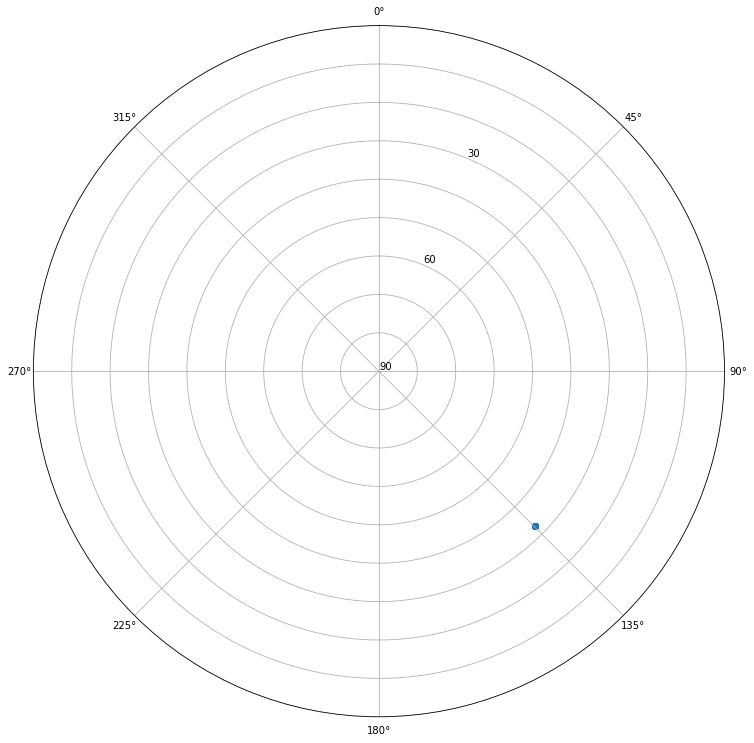

In [7]:
from astropy.time import Time,TimeDelta

T0 = Time("2020-12-15T14:00:00", format='isot', scale='tt')

gmtk = Observer("Hacettepe Geomatik", 39.865447, 32.733690,1000)



# period is exatly 23 hours, 56 minutes and 4.1 one sidereal day

T = 23*60*60+56*60+4.1

a = np.power(Satellite.GM*(T/(2*np.pi))**2,1/3.0)

print (a)

geos = Satellite(a, 0, 0, 0,0,T0)


t = Time("2020-12-15T12:00:00", format='isot', scale='utc')
dt = TimeDelta(30*60,format='sec')


times = []
azimuths = []
elevations=[]

for i in range(48):
    t = t + dt
    pos = geos.pos(t)
    print (t,"C:",gmtk.convert_to_lat_lon(pos[0]), "E:",gmtk.convert_to_lat_lon(pos[1]))
    print ("Satellite Pos ", pos[1])
    x = gmtk.convert_fromECEF(pos[1])
    azel = gmtk.x_to_az_el(x)
    
    print ("Azimuth and Elevation : ",azel[0],azel[1])
    times.append(t)
    azimuths.append(azel[0])
    elevations.append(90-azel[1])

fig = plt.figure(figsize=(12, 12))

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

ax.scatter(np.radians(azimuths),elevations)

ax.set_yticks(range(0, 91, 10))                   # Define the yticks
ax.set_yticklabels(['90', '', '', '60', '', '', '30', '', '', ''])
plt.grid(True)



Orbital Period  5942.541297911045


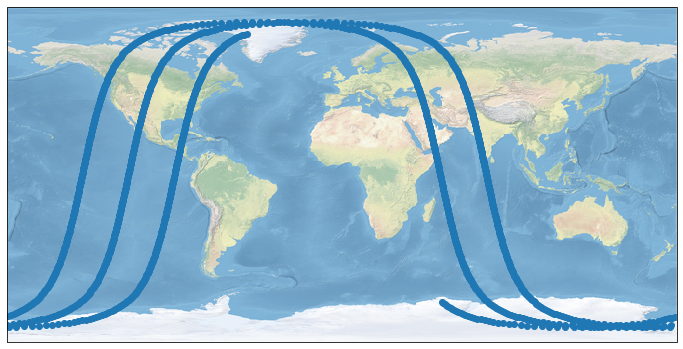

In [8]:
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

open_street_map = cimgt.OSM()

# Lets plot the ground track of a remote sensing satellite

from astropy.time import Time,TimeDelta

T0 = Time("2020-12-15T00:00:00", format='isot', scale='tt')


remote_sensing = Satellite(6371000+720000, 0.0002, 98, 0,0,T0)
print ("Orbital Period ",remote_sensing.T)

t = Time("2020-12-15T12:00:00", format='isot', scale='utc')
dt = TimeDelta(10,format='sec')


times = []
lons = []
lats=[]

for i in range(1500):
    t = t + dt
    pos = remote_sensing.pos(t)
    latlon = gmtk.convert_to_lat_lon(pos[1])
    times.append(t)
    lons.append(latlon[1])
    lats.append(latlon[0])

fig = plt.figure(figsize=(12, 12))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ax.scatter(lons,lats,transform=ccrs.PlateCarree())

plt.show()

Orbital Period  43104.521619575055


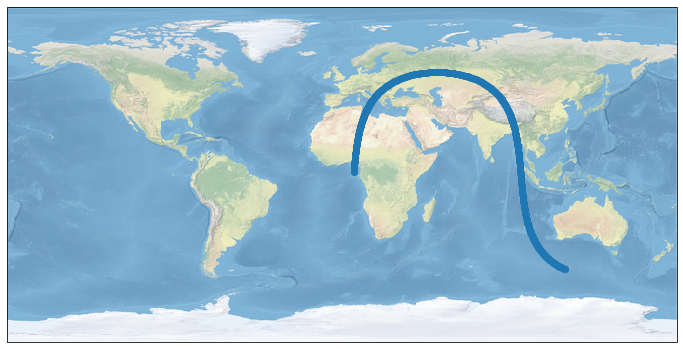

In [9]:
import cartopy.crs as ccrs

# Lets plot the ground track of a typical GNSS satellite

from astropy.time import Time,TimeDelta

T0 = Time("2020-12-15T00:00:00", format='isot', scale='tt')

gnss_satellite = Satellite(6371000+20200000, 0.002, 55, 270,0,T0)
print ("Orbital Period ",gnss_satellite.T)

t = Time("2020-12-15T12:00:00", format='isot', scale='utc')
dt = TimeDelta(60,format='sec')


times = []
lons = []
lats=[]

for i in range(500):
    t = t + dt
    pos = gnss_satellite.pos(t)
    latlon = gmtk.convert_to_lat_lon(pos[1])
    times.append(t)
    lons.append(latlon[1])
    lats.append(latlon[0])

fig = plt.figure(figsize=(12, 12))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.scatter(lons,lats,transform=ccrs.PlateCarree())
plt.show()

Orbital Period  43104.521619575055


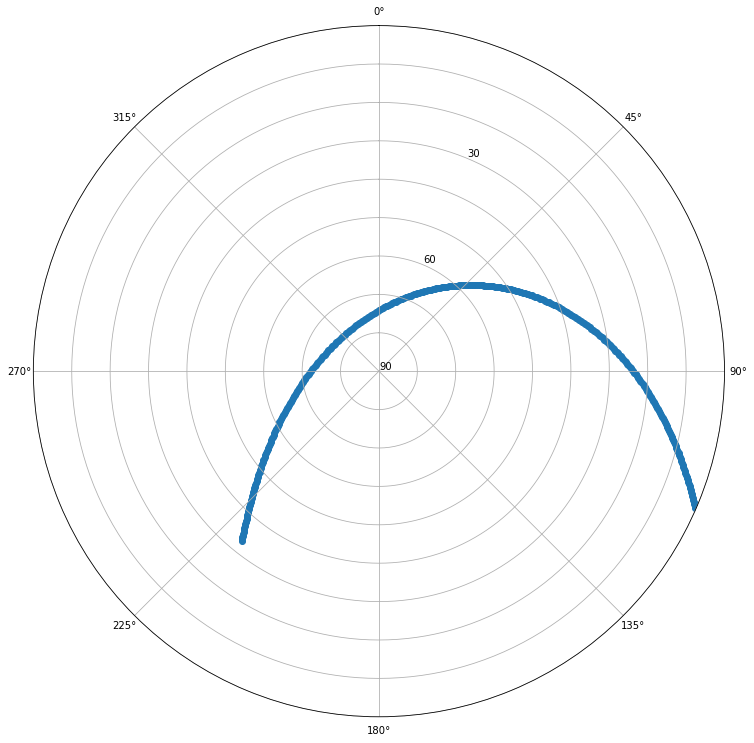

In [10]:
import cartopy.crs as ccrs

# Lets plot the ground track of a typical GNSS satellite

from astropy.time import Time,TimeDelta

T0 = Time("2020-12-15T00:00:00", format='isot', scale='tt')

gnss_satellite = Satellite(6371000+20200000, 0.002, 55, 270,0,T0)
print ("Orbital Period ",gnss_satellite.T)

t = Time("2020-12-15T12:00:00", format='isot', scale='utc')
dt = TimeDelta(60,format='sec')

times = []
azimuths = []
elevations=[]

for i in range(500):
    t = t + dt
    pos = gnss_satellite.pos(t)
    azel = gmtk.x_to_az_el(gmtk.convert_fromECEF(pos[1]))
    if (azel[1]>0): #plot only visible satellites
        times.append(t)
        azimuths.append(azel[0])
        elevations.append(90-azel[1])

fig = plt.figure(figsize=(12, 12))

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

ax.scatter(np.radians(azimuths),elevations)

ax.set_yticks(range(0, 91, 10))                   # Define the yticks
ax.set_yticklabels(['90', '', '', '60', '', '', '30', '', '', ''])
plt.grid(True)

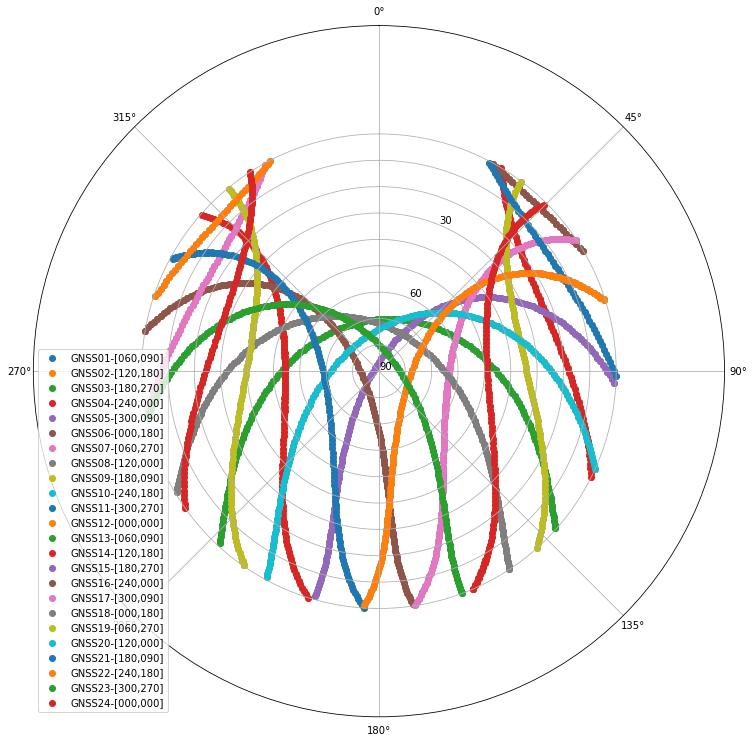

In [11]:
import cartopy.crs as ccrs

# Lets plot the ground track of a typical GNSS satellite

from astropy.time import Time,TimeDelta

T0 = Time("2020-12-15T14:00:00", format='isot', scale='tt')

satellites = {}
positions  = {}

for id in range(1,25,1):
    ran = 60 * (id % 6)
    w = 90*(id %4) 
    name = "GNSS%02d-[%03d,%03d]"%(id,ran,w)
    satellites[name] = Satellite(6371000+20200000, 0.002, 55, ran , w, T0)
    positions[name] = [] # hold satellite azimuth and elevation values


t = Time("2020-12-15T12:00:00", format='isot', scale='utc')
dt = TimeDelta(3*60, format='sec')

for i in range(500):
    t = t + dt
    for sat in satellites:
        
        pos = satellites[sat].pos(t)
        
        latlon = gmtk.convert_to_lat_lon(pos[1])
        azel = gmtk.x_to_az_el(gmtk.convert_fromECEF(pos[1]))
        positions[sat].append( (latlon[0],latlon[1],azel[0],90-azel[1]) )

fig = plt.figure(figsize=(12, 12))

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

for sat in positions:
    azimuths = [v[2] for v in positions[sat] if v[3]<=90]
    elevations = [v[3] for v in positions[sat] if v[3] <= 90]
    ax.scatter(np.radians(azimuths),elevations,label=sat)

ax.set_yticks(range(0, 91, 10))                   # Define the yticks
ax.set_yticklabels(['90', '', '', '60', '', '', '30', '', '', ''])
plt.grid(True)
plt.legend()


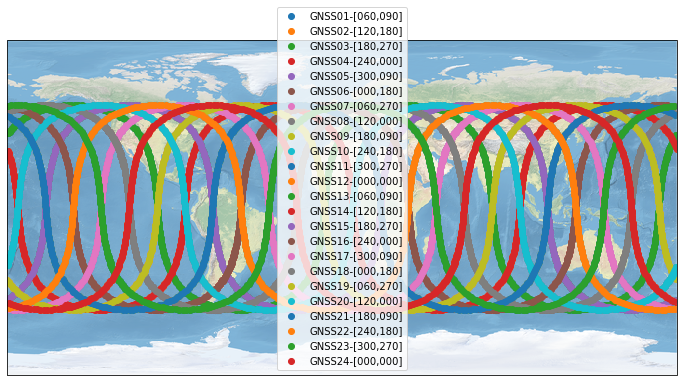

In [12]:
import cartopy.crs as ccrs

# Lets plot the ground track of a typical GNSS satellite

from astropy.time import Time,TimeDelta

T0 = Time("2020-12-15T14:00:00", format='isot', scale='tt')

satellites = {}
positions  = {}

for id in range(1,25,1):
    ran = 60 * (id % 6)
    w = 90*(id %4) 
    name = "GNSS%02d-[%03d,%03d]"%(id,ran,w)
    satellites[name] = Satellite(6371000+20200000, 0.002, 55, ran , w, T0)
    positions[name] = [] # hold satellite azimuth and elevation values


t = Time("2020-12-15T12:00:00", format='isot', scale='utc')
dt = TimeDelta(3*60, format='sec')

for i in range(500):
    t = t + dt
    for sat in satellites:
        
        pos = satellites[sat].pos(t)
        
        latlon = gmtk.convert_to_lat_lon(pos[1])
        azel = gmtk.x_to_az_el(gmtk.convert_fromECEF(pos[1]))
        positions[sat].append( (latlon[0],latlon[1],azel[0],90-azel[1]) )


fig = plt.figure(figsize=(12, 12))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

for sat in positions:
    lons = [v[1] for v in positions[sat] ]
    lats = [v[0] for v in positions[sat] ]
    ax.scatter(lons,lats,transform=ccrs.PlateCarree(),label=sat)
plt.legend()
plt.show()

## 3D simulation of Satellites with vpython

Using the previously created Earth model and newly created satellite object we can simulate the motion of satellites in 3D as well.

In [13]:
from vpython import *
import numpy as np
## import astropy for time and coordinate system calculations
from astropy.time import Time
from astropy.coordinates import Angle,SkyCoord,get_sun
from astropy.time import TimeDelta



class Earth(object):
    def __init__(self):
        ## Earth is a sphere,
        self.obj = sphere ( pos=vector(0,0,0),
                radius = 6371000, 
                visible=True, 
                texture=textures.earth,up=vector(0,0,1),
                flipx = False , shininess = 0.9,opacity=0.9)
        
                
        sw = 30000
        hw=30000     
        
        gcrf_r = 6371000+450000
        itrf_r = 6371000+750000
        
        ## Coordinate system axes for Geocentric Celestial Reference Frame (which we assume to be fixed)
        self.arrow_z_GCRF = arrow(pos=vector(0,0,0),
                             axis=vector(0,0,gcrf_r), shaftwidth=sw,headwidth=hw,color=vector(0,0,1))

        self.arrow_y_GCRF = arrow(pos=vector(0,0,0),
                             axis=vector(0,gcrf_r,0),shaftwidth=sw,headwidth=hw,color=vector(0,1,0))

        self.arrow_x_GCRF = arrow(pos=vector(0,0,0),
                             axis=vector(gcrf_r,0,0), shaftwidth=sw,headwidth=hw,color=vector(1,0,0))

        self.arrow_z_ITRF = arrow(pos=vector(0,0,0),
                             axis=vector(0,0,itrf_r), shaftwidth=sw,headwidth=hw,color=vector(0,0,1))

        self.arrow_y_ITRF = arrow(pos=vector(0,0,0),
                             axis=vector(0,itrf_r,0),shaftwidth=sw,headwidth=hw,color=vector(0,0.6,0.6))

        self.arrow_x_ITRF = arrow(pos=vector(0,0,0),
                             axis=vector(itrf_r,0,0), shaftwidth=sw,headwidth=hw,color=vector(0.8,0.5,0))

        
    def reset_obj(self, o):
        o.axis = vector(1,0,0)
        o.up = vector(0,0,1)
    
    def rotate_obj_to_date(self, o, t):
        jt = ((t.tt.jd - 2451545.0)/36525.0)
        
        gast = t.sidereal_time("mean",longitude=0)
        if (o == self.obj):
            o.rotate(angle = np.radians(90), axis=vector(0,0,1))   
            
        o.rotate(angle = gast.rad, axis=vector(0,0,1))        
    
    
    def next(self, t, dt):

        self.reset_obj(self.obj)
        itrf_r = 6371000+750000
        self.arrow_x_ITRF.axis = vector(itrf_r,0,0)
        self.arrow_y_ITRF.axis = vector(0,itrf_r,0)
        self.arrow_z_ITRF.axis = vector(0,0,itrf_r)
        
        self.rotate_obj_to_date(self.obj,t)
        self.rotate_obj_to_date(self.arrow_z_ITRF,t)
        self.rotate_obj_to_date(self.arrow_y_ITRF,t)
        self.rotate_obj_to_date(self.arrow_x_ITRF,t)

<IPython.core.display.Javascript object>

In [ ]:
scene.width = 800
scene.height = 600
scene.title = "Earth Rotation Sample"
scene.visible=False
running = False

t = Time('2020-1-1T11:58:55.816', scale='utc',location=('0','0'))

def Run(b):
    global running
    running = not running
    if running: b.text = "Pause"
    else: b.text = "Run"

def Redefine(w):
    print(w.text)
    global t
    t = Time(w.text, scale='utc',location=('0','0'))
    
        
button(text="Run", pos=scene.title_anchor, bind=Run)
winput(prompt="Redefine", pos=scene.title_anchor, bind=Redefine)

scene.caption = "Vary the time increment: \n\n"


def setspeed(s):
    wt.text = 'Delta t = {:1.2f}'.format(s.value)
    
sl = slider(min=1, max=1*60*60, value=1, length=220, bind=setspeed, right=15)

wt = wtext(text='{:1.2f}'.format(sl.value))
scene.waitfor("textures")
scene.visible = True  # show everything
dt = 30

earth = Earth()


ecliptic = ring(pos=vector(0,0,0),
        axis=vector(0,0,1),
        radius=8000000, thickness=30000)

equator = ring(pos=vector(0,0,0),
        axis=vector(0,0,1),
        radius=6371000, thickness=30000,color=color.red)

ecliptic.rotate(np.radians(23.5),axis=vector(1,0,0))


satellites = {}
positions_3d  = {}

for id in range(1,2,1):
    ran = 0
    w = 0 
    name = "GNSS%02d-[%03d,%03d]"%(id,ran,w)
    satellites[name] = Satellite(6371000+20200000, 0.2, 90, ran , w, T0)

    pos = satellites[name].pos(T0)
    positions_3d[name] = sphere ( pos=vector(pos[0][0,0],pos[0][1,0],pos[0][2,0]), 
                            radius = 100000, visible=True, color=vector(np.random.rand(),np.random.rand(),np.random.rand()),
                            make_trail=True, trail_type="curve", interval=1, retain=5000
                          )


t = T0.utc



while True:
    rate(10)
    if (not running):
        continue
    dt = sl.value
    
    tdt = TimeDelta(dt,format='sec')

    t = t + tdt
    gast = t.sidereal_time("apparent",longitude=0)
    wt.text = ' %s dt = %d seconds  JD=%f GAST = %s' % (str(t),sl.value,t.mjd, str(gast))
    
    earth.next(t, tdt)
    for sat in satellites:
        pos = satellites[sat].pos(t)
        positions_3d[sat].pos=vector(pos[0][0,0],pos[0][1,0],pos[0][2,0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>